In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# **1. Load dataset**

In [2]:
churn_df = pd.read_csv("dataset.csv")
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **2. Convert target column 'Churn' only before splitting**

In [4]:
# Encoding 'Churn' Column
churn_encoder = OrdinalEncoder(categories=[['No', 'Yes']]) # No = 0, Yes = 1
churn_df['Churn'] = churn_encoder.fit_transform(churn_df[['Churn']])

# **3. Split Train/Test first to prevents data leakage**

In [5]:
X = churn_df.drop(columns=['customerID', 'Churn'])
y = churn_df['Churn']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 19)
X_test shape: (1409, 19)
y_train shape: (5634,)
y_test shape: (1409,)


# **Feature Engineering on 'Training data' only**

# **4. Fix Data Type**

In [8]:
# Convert 'TotalCharges' from object to float64
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

# **5. Check for missing values and handle them**

In [9]:
print("X_train dataset:")
print(X_train.isnull().sum())

print("\nX_test dataset:")
print(X_test.isnull().sum())

X_train dataset:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64

X_test dataset:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64


In [10]:
# Handle the 11 missing values in "TotalCharges" column
median_total_charges = X_train['TotalCharges'].median()
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(median_total_charges)
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(median_total_charges)

In [11]:
print("After handling missing values")
print(f'TotalCharges in X_train: {X_train['TotalCharges'].isnull().sum()}')
print(f'TotalCharges in X_test: {X_test['TotalCharges'].isnull().sum()}')

After handling missing values
TotalCharges in X_train: 0
TotalCharges in X_test: 0


# **6. Look for and fix outliers**

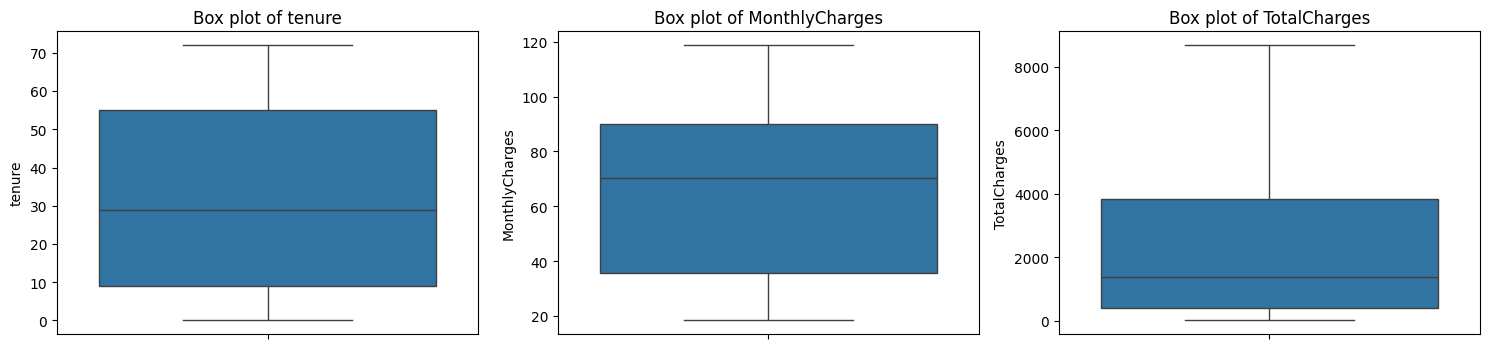

In [12]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(data=X_train, y=col)
  plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

- All three numerical columns contain no outliers.
- So we don't need to handle outliers.

# **7. Encode categorical features**

**Encode X_train columns**

In [13]:
# 1). Encoding 'gender' Column
gender_encoder = OrdinalEncoder(categories=[['Female', 'Male']]) # Female = 0, Male = 1
X_train['gender'] = gender_encoder.fit_transform(X_train[['gender']])

# 2). Encoding 'Partner' Column
partner_encoder = OrdinalEncoder(categories=[['No', 'Yes']]) # No = 0, Yes = 1
X_train['Partner'] = partner_encoder.fit_transform(X_train[['Partner']])

# 3). Encoding 'Dependents' Column
dependents_encoder = OrdinalEncoder(categories=[['No', 'Yes']]) # No = 0, Yes = 1
X_train['Dependents'] = dependents_encoder.fit_transform(X_train[['Dependents']])

# 4). Encoding 'PhoneService' Column
phone_service_encoder = OrdinalEncoder()
X_train['PhoneService'] = phone_service_encoder.fit_transform(X_train[['PhoneService']])

# 5). Encoding 'MultipleLines' Column
multiple_lines_encoder = OrdinalEncoder(categories=[['No phone service', 'No', 'Yes']]) # No phone service = 0, No = 1, Yes = 2
X_train['MultipleLines'] = multiple_lines_encoder.fit_transform(X_train[['MultipleLines']])

# 6). Encoding 'InternetService' Column
internet_service_encoder = OrdinalEncoder(categories=[['No', 'DSL', 'Fiber optic']]) # No = 0, DSL = 1, Fiber optic = 2
X_train['InternetService'] = internet_service_encoder.fit_transform(X_train[['InternetService']])

# 7). Encoding 'OnlineSecurity' Column
online_security_encoder = OrdinalEncoder(categories=[['No internet service', 'No', 'Yes']]) # No internet service = 0, No = 1, Yes = 2
X_train['OnlineSecurity'] = online_security_encoder.fit_transform(X_train[['OnlineSecurity']])

# 8). Encoding 'OnlineBackup' Column
online_backup_encoder = OrdinalEncoder(categories=[['No internet service', 'No', 'Yes']]) # No internet service = 0, No = 1, Yes = 2
X_train['OnlineBackup'] = online_backup_encoder.fit_transform(X_train[['OnlineBackup']])

# 9). Encoding 'DeviceProtection' Column
device_protection_encoder = OrdinalEncoder(categories=[['No internet service', 'No', 'Yes']]) # No internet service = 0, No = 1, Yes = 2
X_train['DeviceProtection'] = device_protection_encoder.fit_transform(X_train[['DeviceProtection']])

# 10). Encoding 'TechSupport' Column
tech_support_encoder = OrdinalEncoder(categories=[['No internet service', 'No', 'Yes']]) # No internet service = 0, No = 1, Yes = 2
X_train['TechSupport'] = tech_support_encoder.fit_transform(X_train[['TechSupport']])

# 11). Encoding 'StreamingTV' Column
streaming_tv_encoder = OrdinalEncoder(categories=[['No internet service', 'No', 'Yes']]) # No internet service = 0, No = 1, Yes = 2
X_train['StreamingTV'] = streaming_tv_encoder.fit_transform(X_train[['StreamingTV']])

# 12). Encoding 'StreamingMovies' Column
streaming_movies_encoder = OrdinalEncoder(categories=[['No internet service', 'No', 'Yes']]) # No internet service = 0, No = 1, Yes = 2
X_train['StreamingMovies'] = streaming_movies_encoder.fit_transform(X_train[['StreamingMovies']])

# 13). Encoding 'Contract' Column
contract_encoder = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']]) # Month-to-month = 0, One Year = 1, Two year = 2
X_train['Contract'] = contract_encoder.fit_transform(X_train[['Contract']])

# 14). Encoding 'PaperlessBilling' Column
paperless_billing_encoder = OrdinalEncoder(categories=[['No', 'Yes']]) # No = 0, Yes = 1
X_train['PaperlessBilling'] = paperless_billing_encoder.fit_transform(X_train[['PaperlessBilling']])

# 15). Encoding 'PaymentMethod' Column
payment_method_encoder = OrdinalEncoder(categories=[['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']])
# Electronic check = 0, Mailed check = 1, Bank transfer (automatic) = 2, Credit card (automatic) = 3
X_train['PaymentMethod'] = payment_method_encoder.fit_transform(X_train[['PaymentMethod']])

Encode X_test columns

In [14]:
encoders = {
    'gender': gender_encoder, # 1
    'Partner': partner_encoder, # 2
    'Dependents': dependents_encoder, # 3
    'PhoneService': phone_service_encoder, # 4
    'MultipleLines': multiple_lines_encoder, # 5
    'InternetService': internet_service_encoder, # 6
    'OnlineSecurity': online_security_encoder, # 7
    'OnlineBackup': online_backup_encoder, # 8
    'DeviceProtection': device_protection_encoder, # 9
    'TechSupport': tech_support_encoder, # 10
    'StreamingTV': streaming_tv_encoder, # 11
    'StreamingMovies': streaming_movies_encoder, # 12
    'Contract': contract_encoder, # 13
    'PaperlessBilling': paperless_billing_encoder, # 14
    'PaymentMethod': payment_method_encoder # 15
}

for col, encoder in encoders.items():
    X_test[col] = encoder.transform(X_test[[col]])

# **8. Scale numerical features**

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply to train data
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

# Apply same scaling to test data
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(
    X_test[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

# **9. Feature selection**

In [16]:
# Create a copy of training data for feature selection
# This way we can keep original X_train safe
X_train_for_selection = X_train.copy()
X_train_for_selection['Churn'] = y_train.values

# Calculate correlations
correlation_with_churn = X_train_for_selection.corr(numeric_only=True)['Churn'].drop('Churn').sort_values(ascending=False)

print("Correlation of features with 'Churn':")
print(correlation_with_churn)

Correlation of features with 'Churn':
InternetService     0.320455
MonthlyCharges      0.198040
PaperlessBilling    0.197981
StreamingTV         0.170737
StreamingMovies     0.165078
SeniorCitizen       0.145599
DeviceProtection    0.087857
OnlineBackup        0.073990
MultipleLines       0.041755
TechSupport         0.026419
OnlineSecurity      0.021340
PhoneService        0.017928
gender             -0.002208
Partner            -0.145717
Dependents         -0.167459
TotalCharges       -0.194403
PaymentMethod      -0.271057
tenure             -0.345593
Contract           -0.397269
Name: Churn, dtype: float64


In [17]:
selected_features = correlation_with_churn[abs(correlation_with_churn) > 0.05].index.tolist()

# Ensure the selected features are in the original order of X_train
original_x_train_cols = X_train.columns.tolist()
selected_features_ordered = [col for col in original_x_train_cols if col in selected_features]

print(f"\nFeatures selected based on absolute correlation > 0.05 with 'Churn':\n{selected_features_ordered}")

# Apply feature selection to training data
X_train_selected = X_train[selected_features_ordered]

# Apply same feature selection to test data
X_test_selected = X_test[selected_features_ordered]


Features selected based on absolute correlation > 0.05 with 'Churn':
['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [18]:
# # Select features with strong correlation
# selected_features = correlation_with_churn[abs(correlation_with_churn) > 0.05].index.tolist()
# print(f"\nFeatures selected based on absolute correlation > 0.05 with 'HeartDisease':\n{selected_features}")

# # Apply feature selection to training data
# X_train_selected = X_train[selected_features]

# # Apply same feature selection to test data
# X_test_selected = X_test[selected_features]

# **10. Balancing the dataset (for classification only)**

In [19]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data with selected features
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

In [20]:
print(y_train.value_counts())
print()
print(y_train_balanced.value_counts())

Churn
0.0    4139
1.0    1495
Name: count, dtype: int64

Churn
0.0    4139
1.0    4139
Name: count, dtype: int64


# **11. Save the new (preprocessed) train and test datasets**

In [21]:
# Save balanced training data
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

# Save test data (UNBALANCED - keep it as is for proper evaluation)
X_test_selected.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("All processed datasets saved")

All processed datasets saved


In [22]:
import joblib  # Better than pickle for large objects

# Save scaler right after fitting it
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved to scaler.pkl")

Scaler saved to scaler.pkl
